Ensemble learning 是一种机器学习方法，它通过组合多个弱学习器（weak learners）来构建一个强学习器（strong learner）。这个组合的过程旨在提高模型的性能和泛化能力，从而改善对新样本的预测表现。

Bagging (Bootstrap Aggregating)使用自助采样（bootstrap sampling）的方法从训练集中随机抽取多个子集，然后在每个子集上训练一个独立的学习器。最终的预测结果通过投票或平均得到。随机森林（Random Forest）是 Bagging 的一个典型例子，它基于决策树构建。

Boosting 通过迭代地训练一系列弱学习器，每个弱学习器都试图纠正前一个学习器的错误。最终的预测结果是所有弱学习器的加权和。
AdaBoost 和 Gradient Boosting 是 Boosting 的代表性算法。

Stacking 利用多个基础学习器的预测结果，将它们作为输入，再通过一个元学习器进行最终的预测。Stacking 的关键是如何选择和训练元学习器，通常使用交叉验证来完成这一过程。

![Alt Text](Dic/ensemble1.png)

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, test_size = 0.3, random_state=0)

![Alt Text](Dic/ensemble2.png)

In [3]:
# モジュールのインポート
from sklearn.ensemble import BaggingClassifier
# ここでは決定木を使うことにする（以前の回を参照）
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
# 学習
iris_bag = BaggingClassifier(iris_tree, n_estimators = 10,max_samples = 0.5, random_state=0)
iris_bag.fit(X_train, y_train)
iris_bag_pre = iris_bag.predict(X_test)
print(accuracy_score(y_test, iris_bag_pre))

0.9111111111111111


In [4]:
from sklearn.svm import SVC
iris_svm = SVC(kernel='linear', C=1.0, random_state=0)
iris_bag2=BaggingClassifier(iris_svm, n_estimators = 10,max_samples = 0.5, random_state=0)

iris_bag2.fit(X_train, y_train)
iris_bag2_pre = iris_bag2.predict(X_test)
print(accuracy_score(y_test, iris_bag2_pre))

0.9777777777777777


![Alt Text](Dic/ensemble3.png)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
# ここでも決定木を使うことにする（前のスライドを参照）

iris_ab = AdaBoostClassifier(iris_tree, n_estimators = 10,
random_state=0)
iris_ab.fit(X_train, y_train)
# 評価
iris_ab_pre = iris_ab.predict(X_test)
print(accuracy_score(y_test, iris_ab_pre))

0.9555555555555556


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
# 学習（決定木を指定する必要はない）
iris_gb = GradientBoostingClassifier(n_estimators = 10,
random_state=0)
iris_gb.fit(X_train, y_train)
# 評価
iris_gb_pre = iris_gb.predict(X_test)
print(accuracy_score(y_test, iris_gb_pre))

0.9777777777777777



随机森林（Random Forest）是一种基于 Bagging 思想的集成学习方法，通常应用于分类和回归问题。它通过构建多个决策树，然后将它们的预测结果进行组合，以提高整体模型的性能和泛化能力。

以下是随机森林的主要特点和步骤：

随机选择训练样本： 对于每棵决策树的训练，从训练集中进行自助采样（Bootstrap Sampling），即随机有放回地从原始训练集中抽取一定数量的样本用于构建该决策树。

随机选择特征： 在构建每个决策树的过程中，对于每个节点的划分，随机选择一部分特征子集，而不是使用所有特征。这有助于增加每个决策树之间的差异性。

构建决策树： 使用选定的训练样本和特征子集来构建一棵决策树。在每个节点上，通过某种标准（例如 Gini 不纯度或信息增益）选择最优的特征进行划分。

重复步骤1-3： 重复步骤1-3，构建多棵决策树。

集成预测： 对于分类问题，通过对所有决策树的预测结果进行投票，选择获得最多投票的类别作为最终的预测结果。对于回归问题，可以取所有决策树预测结果的平均值。

随机森林的优点包括：

高度并行化： 由于每棵树都是独立训练的，可以并行计算，从而提高了训练效率。
抗过拟合： 通过随机选择样本和特征，减少了过拟合的风险。
高准确性： 在许多问题上，随机森林通常能够取得很好的性能。

In [7]:
# モジュールのインポート
from sklearn.ensemble import RandomForestClassifier
# 学習（ DecisionTreeClassifier を作成する必要はない）
iris_rf = RandomForestClassifier(n_estimators=100,
random_state=0)
iris_rf.fit(X_train, y_train)
# 評価
iris_rf_pre = iris_rf.predict(X_test)
print(accuracy_score(y_test, iris_rf_pre))

0.9777777777777777


在随机森林中，通过衡量每个特征在决策树的构建过程中对模型性能的提升程度，可以估计每个特征的重要性。这个衡量标准通常被称为特征的"重要度"。

Gini 不纯度（Gini Impurity）减少： 对于每个节点的分裂，可以计算通过该节点分裂后的 Gini 不纯度减少量。节点分裂后的 Gini 不纯度减少越大，说明该特征在该节点处的重要性越高。

袋外误差减少（Out-of-Bag Error Reduction）： 随机森林的训练集是通过自助采样得到的，因此每个决策树都有一些样本未被抽到，称为袋外样本。可以通过测量每个特征在袋外样本上的预测误差减少来估计特征的重要性。

特征使用频率： 统计每个特征在所有树的节点分裂中被使用的次数，频率越高，说明该特征越重要。

In [9]:
# 変数名と個数
var_name = iris.feature_names
var_num = len(var_name)
# 各変数の重要度
importance = iris_rf.feature_importances_
# 降順に並べて出力
var_index = np.argsort(importance)[::-1]
for i in var_index:
    print("%2d) %-*s %f" % (i, 20, var_name[i],importance[i]))

 2) petal length (cm)    0.479778
 3) petal width (cm)     0.394131
 0) sepal length (cm)    0.102444
 1) sepal width (cm)     0.023647


Text(0.5, 1.0, 'Importance')

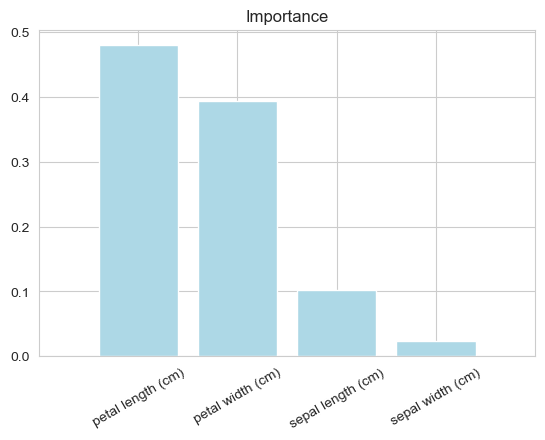

In [10]:
# グラフをプロット
plt.bar(range(var_num), importance[var_index],
color='lightblue', align='center')
# 軸やタイトルの設定
var_name2 = [ iris.feature_names[i] for i in var_index ]
plt.xticks(range(var_num), var_name2, rotation=30)
plt.subplots_adjust(bottom=0.2)
plt.xlim([-1, var_num])
plt.title('Importance')

![Alt Text](Dic/ensemble4.png)
![Alt Text](Dic/ensemble5.png)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
# ここでは決定木とSVMとナイーブベイズを使うことにする
vote_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
vote_svm = SVC(kernel='linear', C=1.0)
vote_nb = MultinomialNB()
# それぞれ何か名前を付けて，各ペアのリストにする
vote_est = [('tree', vote_tree), ('svm', vote_svm), ('nb',vote_nb)]
from sklearn.ensemble import VotingClassifier
# 投票器
iris_vote = VotingClassifier(estimators=vote_est)
# 学習
iris_vote.fit(X_train, y_train)
# 評価
iris_vote_pre = iris_vote.predict(X_test)
print(accuracy_score(y_test, iris_vote_pre))

0.9777777777777777


In [22]:
#重み付き投票
iris_vote2 = VotingClassifier(estimators=vote_est,voting='hard', weights=[3, 5, 5])
iris_vote2.fit(X_train, y_train)
iris_vote2_pre = iris_vote2.predict(X_test)
print(accuracy_score(y_test, iris_vote2_pre))

0.9777777777777777


![Alt Text](Dic/ensemble6.png)
![Alt Text](Dic/ensemble7.png)

In [23]:
#stacking 叠加
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
# ここでは決定木とSVMとナイーブベイズを使うことにする
stack_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
stack_svm = SVC(kernel='linear', C=1.0)
stack_nb = MultinomialNB()
# それぞれ何か名前を付けて，各ペアのリストにする
stack_est = [('tree', stack_tree), ('svm', stack_svm),('nb', stack_nb)]

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
# メタ分類器（ここではランダムフォレストにする）
final_rf = RandomForestClassifier(n_estimators=100)
iris_stack = StackingClassifier(estimators=stack_est,final_estimator=final_rf)
# 学習
iris_stack.fit(X_train, y_train)
# 評価
iris_stack_pre = iris_stack.predict(X_test)
print(accuracy_score(y_test, iris_stack_pre))

0.9777777777777777


In [ ]:
![Alt Text](Dic/ensemble8.png)